In [1]:
import random
# 1. a) Tossing a coin 10,000 times and calculating the experimental probability of heads and tails.  

def coin(trial=10000):
    head = 0
    for i in range(trial):
        if random.choice(['H', 'T']) == 'H':
            head += 1
    tail = trial - head
    print(f"Heads: {head/trial:.3f}, Tails: {tail/trial:.3f}")
coin()

Heads: 0.502, Tails: 0.498


In [2]:
import random

# 1. b) b. Rolling two dice and computing the probability of getting a sum of 7.  
#Steps : 
# a. Use Python's random module for simulations.  
# b. Implement loops for repeated trials.  
# c. Track outcomes and compute probabilities.

def dice(trial = 10000):
    sum = 0
    for i in range(trial):
        d1 = random.randint(1,6)
        d2 = random.randint(1,6)
        dice_sum = d1 + d2
        if dice_sum == 7:
           sum += 1
    print(f"probability of sum = 7 is {sum/trial:.3f}")
dice()

probability of sum = 7 is 0.164


In [ ]:
import random

# 2. Write a function to estimate the probability of getting at least one "6" in 10 rolls of a fair die.  
#Steps :  
# a. Simulate rolling a die 10 times using a loop.  
# b. Track trials where at least one "6" occurs.  
# c. Calculate the proportion of successful trials

def getting_six(trial = 10000):
    six = 0
    for i in range(trial):
        roll = [random.randint(1,6) for _ in range(10)] # 10 rolls

        if 6 in roll:
                six += 1
    prob = six/trial
    print(f"probability of atleat one 6 is {prob:.3f}")
getting_six()

In [15]:
# 3. A bag contains 5 red, 7 green, and 8 blue balls. A ball is drawn randomly, its color noted, and it is put back into the bag. If this process is repeated 1000 times, write a Python program to estimate:  
# a. The probability of drawing a red ball given that the previous ball was blue.  
# b. Verify Bayes' theorem with the simulation results.

import random

def ball(trials=1000):
    colors = ['red']*5 + ['green']*7 + ['blue']*8
    red_after_blue = 0
    blue_count = 0
    total_red = 0
    blue_before_red = 0
    prev = None

    for _ in range(trials):
        current = random.choice(colors)
        if prev == 'blue':
            blue_count += 1
            if current == 'red':
                red_after_blue += 1
        if current == 'red':
            total_red += 1
            if prev == 'blue':
                blue_before_red += 1
        prev = current

    if blue_count:
        print(f"P(Red | Blue before): {red_after_blue / blue_count:.3f}")
    else:
        print("P(Red | Blue before): 0")
 
    print("Bayes :", (blue_before_red / total_red) * (total_red / trials) / (8/20))

ball()



P(Red | Blue before): 0.232
Bayes RHS: 0.2175


In [5]:
import numpy as np

# 4. Generate a sample of size 1000 from a discrete random variable with the following distribution:  
#- P(X=1) = 0.25  
#- P(X=2) = 0.35  
#- P(X=3) = 0.4  
#Compute the empirical mean, variance, and standard deviation of the sample.  
#Steps  
# a. Use numpy.random.choice() to generate the sample.  
# b. Use numpy methods to calculate mean, variance, and standard deviation.

          
# Define the values and their probabilities
values = [1, 2, 3]
probabilities = [0.25, 0.35, 0.4]

# sample 
a = np.random.choice(values, size=1000, p=probabilities)

mean = np.mean(a)
var = np.var(a)
std_deviation = np.std(a)

print("Empirical Mean:", mean)
print(f"Variance: {var:.3f}")
print(f"Standard Deviation: {std_deviation:.3f}")


Empirical Mean: 2.104
Variance: 0.647
Standard Deviation: 0.804


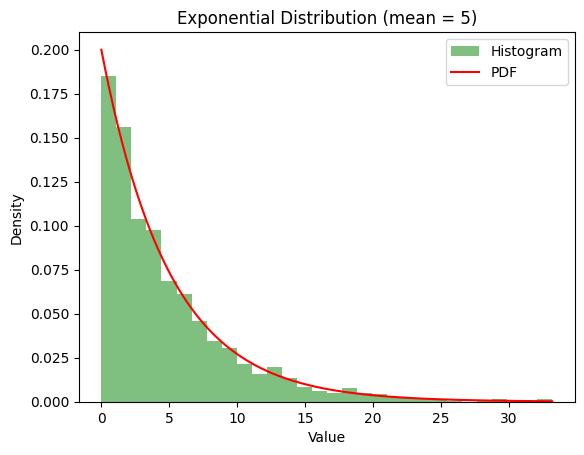

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 5. Simulate 2000 random samples from an exponential distribution with a mean of 5. Visualize the distribution using:  
# a. A histogram.  
# b. A probability density function (PDF) overlay.  
# Steps : 
# a. Use numpy.random.exponential().  
# b. Use matplotlib to create visualizations.  

# a:
data = np.random.exponential(scale=5, size=2000) # scale = mean here

# b:
# bins = 30 - it divide data in 30 equal parts/interval
# alpha for transparency it ranges from 0(low) to 1(high)
plt.hist(data, bins=30, density=True, alpha=0.5, color='green', label='Histogram')

# exp formula: (1/mean) * exp(-x/mean)
x = np.linspace(0, max(data), 1000)
pdf = (1/5) * np.exp(-x/5)
plt.plot(x, pdf, 'r-', label='PDF') # r-  plot curve in red with label PDF

plt.title('Exponential Distribution (mean = 5)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


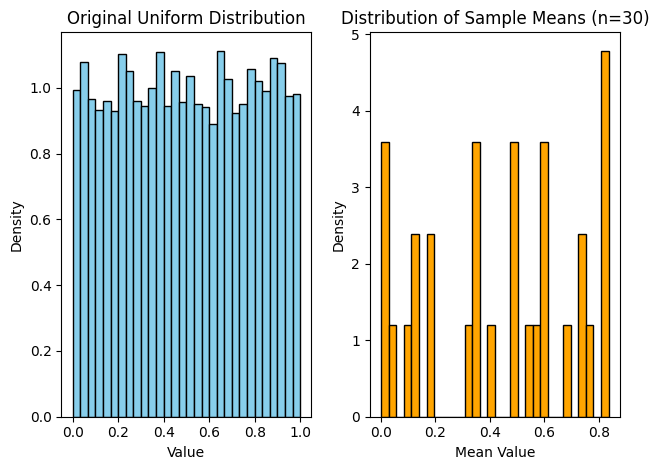

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#6. Simulate the Central Limit Theorem by following these steps  
# a. Generate 10,000 random numbers from a uniform distribution.  
# b. Draw 1000 samples of size n = 30.  
# c. Calculate and visualize the distribution of sample means.  
#Steps  
# a. Use numpy.random.uniform().  
# b. Plot both the uniform distribution and the sample mean distribution for comparison

# a
a = np.random.uniform(low=0, high=1, size=10000) # create a uniform distribution between 0 and 1

# b
samples = [] # empty list 
for _ in range(1000):
    s = np.random.choice(a,size=30) 
    samples.append(np.mean(s)) # np.mean(s) - calculate mean of sample s

# c
plt.figure(figsize=(15,7)) # width-15 , height -7

# first subplot
plt.subplot(1, 2, 1)  # 1 row , 2 column, position 1
plt.hist(a, bins=30, color='skyblue', edgecolor='black', density=True)  # density - true scales y-axis
plt.title('Original Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Density')

# sample mean distribution
plt.subplot(1, 2, 2) # 2nd subplot
plt.hist(s, bins=30, color='orange', edgecolor='black', density=True)
plt.title('Distribution of Sample Means (n=30)')
plt.xlabel('Mean Value')
plt.ylabel('Density')

plt.tight_layout()  # adjust spacing so title labels dont overlap
plt.show()